Import Data

In [22]:
import pandas as pd

# Load data
data=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Show data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Data Preprocessing

In [23]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
for col in data.columns:
    data[col]=le.fit_transform(data[col])

data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0,1,0,9,3,2,4,3,3,11,10,6,2
1,1,1,1,1,4,2,9,5,0,9,8,19,2
2,2,1,1,1,4,2,9,5,0,9,8,19,2
3,3,1,1,6,1,0,0,5,2,22,17,0,1
4,4,1,1,6,1,0,0,5,2,22,17,0,1


Extract Feature,Target

In [5]:
X = data.drop(["Sleep Disorder","Person ID"],axis=1)   #Feature Matrix
Y = data["Sleep Disorder"]          #Target Variable


Partition

In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)  # 70% training and 30% test

Train Model

In [18]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(5,7,7), # 5 7 7
                    random_state=5, #5
                    verbose=True,
                    solver='adam', #default
                    activation='relu', #defualt rectified linear unit function
                    learning_rate_init=0.021
                    )
clf.fit(X_train,Y_train)


Iteration 1, loss = 1.41345760
Iteration 2, loss = 0.98664513
Iteration 3, loss = 0.90754475
Iteration 4, loss = 0.84474908
Iteration 5, loss = 0.83123321
Iteration 6, loss = 0.81265829
Iteration 7, loss = 0.77660833
Iteration 8, loss = 0.74088565
Iteration 9, loss = 0.70012568
Iteration 10, loss = 0.65387742
Iteration 11, loss = 0.58405758
Iteration 12, loss = 0.53466369
Iteration 13, loss = 0.47757085
Iteration 14, loss = 0.48604133
Iteration 15, loss = 0.45832042
Iteration 16, loss = 0.43403106
Iteration 17, loss = 0.41505078
Iteration 18, loss = 0.40933511
Iteration 19, loss = 0.40427611
Iteration 20, loss = 0.39960191
Iteration 21, loss = 0.38727274
Iteration 22, loss = 0.40390619
Iteration 23, loss = 0.38354912
Iteration 24, loss = 0.37704692
Iteration 25, loss = 0.38595247
Iteration 26, loss = 0.36347497
Iteration 27, loss = 0.35323364
Iteration 28, loss = 0.35060408
Iteration 29, loss = 0.35041051
Iteration 30, loss = 0.34789402
Iteration 31, loss = 0.34558012
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(5, 7, 7), learning_rate_init=0.021,
              random_state=5, verbose=True)

Loss Curve Display

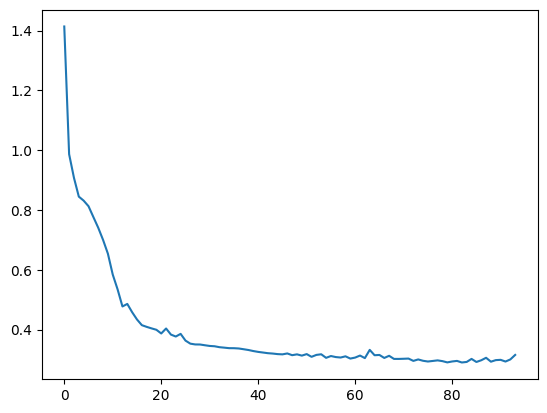

In [19]:
loss_values = clf.loss_curve_
import matplotlib.pyplot as plt

plt.plot(loss_values)
plt.show()


Model Evaluation

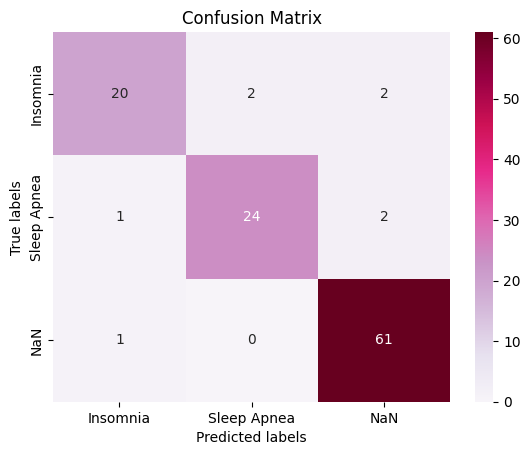

In [20]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix 

Y_predict = clf.predict(X_test)

# Generate Confusion Metrix
cm = confusion_matrix(Y_test, Y_predict)
ax= plt.subplot()
sns.heatmap(cm, cmap='PuRd', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# Set label,title name
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Insomnia', 'Sleep Apnea' , 'NaN']); ax.yaxis.set_ticklabels(['Insomnia', 'Sleep Apnea' , 'NaN']);


FORMULA

Accuracy = (TP+TN)/(TP+FN+TN+FN)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F1_Score = 2*Precision*Recall/(Precision+Recall)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calcuate accuracy
print("accuracy_score:",accuracy_score(Y_test,Y_predict))
print("precision_score:",precision_score(Y_test,Y_predict,average='weighted'))
print("recall_score:",recall_score(Y_test,Y_predict,average='weighted'))
print("f1_score:",f1_score(Y_test,Y_predict,average='weighted'))

accuracy_score: 0.9292035398230089
precision_score: 0.9285475586360541
recall_score: 0.9292035398230089
f1_score: 0.9281544294175291
